In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (33,58,99) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


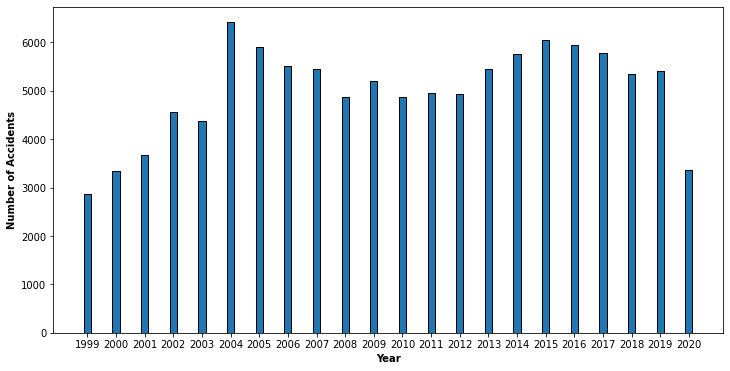

In [3]:
import pandas as pd
import numpy as np
import calendar
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/data_mining/Crashes.csv')
df['Year'] = pd.DatetimeIndex(df['date']).year.astype('Int64')
# df['Month'] = pd.DatetimeIndex(df['date']).month_name()
df['Month'] = pd.DatetimeIndex(df['date']).month.astype('Int64')
df_year = df.groupby(["Year"]).size()
df_month = df.groupby(["Month"]).size()
barWidth = 0.25
bars1 = df_year.values
r1 = np.arange(len(bars1))

plt.rcParams["figure.figsize"]=[12, 6]
plt.bar(r1, bars1, width=barWidth, edgecolor='black')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(bars1))], df_year.index.get_level_values('Year').unique())

plt.xlabel("Year",fontweight='bold')
plt.ylabel("Number of Accidents",fontweight='bold')
plt.show()


 



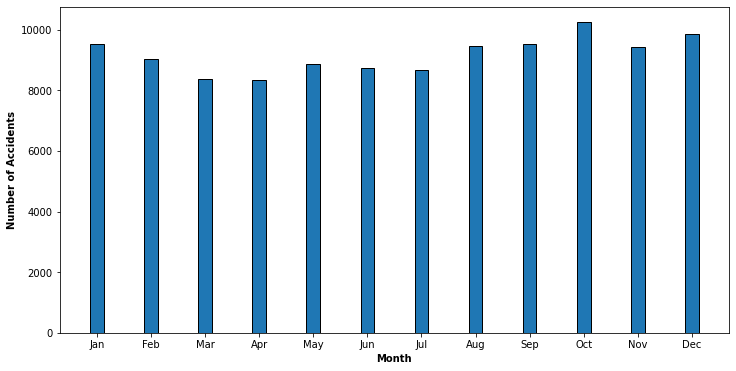

In [4]:
bars2 = df_month.values
r2 = np.arange(len(bars2))

plt.rcParams["figure.figsize"]=[12, 6]
plt.bar(r2, bars2, width=barWidth, edgecolor='black')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(bars2))])
# plt.xticks([r for r in range(len(bars2))], df_month.index.get_level_values('Month').unique())
plt.gca().set_xticklabels(calendar.month_abbr[r] for r in range(1,len(bars2)+1))
plt.xlabel("Month",fontweight='bold')
plt.ylabel("Number of Accidents",fontweight='bold')

plt.show()

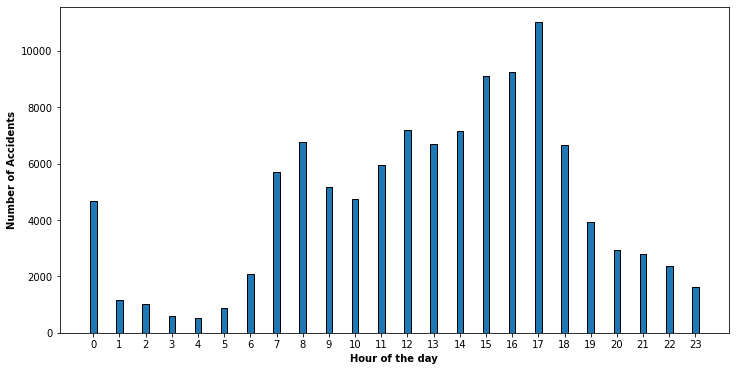

In [5]:
df['Hour'] = pd.DatetimeIndex(df['date']).hour.astype('Int64')
df_hour = df.groupby(["Hour"]).size()
bars3 = df_hour.values
r3 = np.arange(len(bars3))

# plt.rcParams["figure.figsize"]=[12, 6]
plt.bar(r3, bars3, width=barWidth, edgecolor='black')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(bars3))],df_hour.index.get_level_values('Hour').unique())
plt.xlabel("Hour of the day",fontweight='bold')
plt.ylabel("Number of Accidents",fontweight='bold')

plt.show()

Temporal analysis of severity of accidents

Year  severity
1999  FAT            9
      INJ          922
      PDO         1936
2000  FAT           25
      INJ         1133
                  ... 
2019  INJ         1535
      PDO         3846
2020  FAT           14
      INJ          960
      PDO         2386
Length: 66, dtype: int64


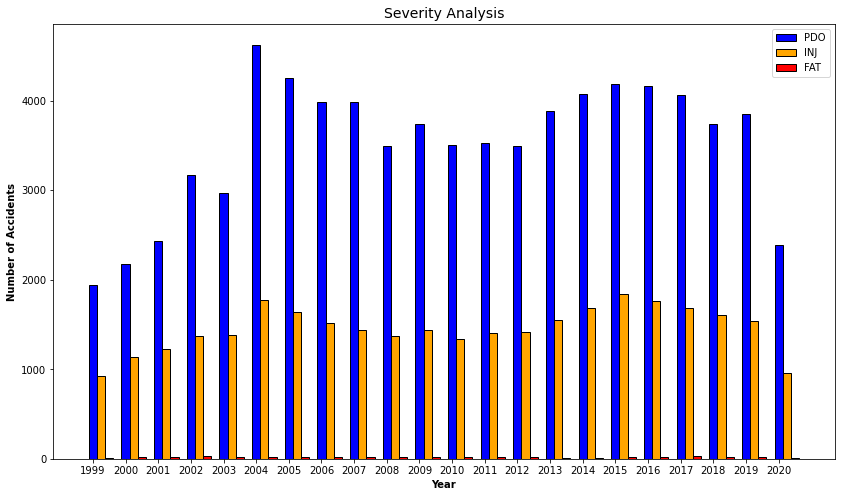

In [6]:
frames = [df['Year'],df['severity']]
result = pd.concat(frames, axis=1)
df_severity = result.groupby(["Year","severity"]).size()
print(df_severity)

sev_bars1 = df_severity.loc[(df_severity.index.get_level_values('severity') =="PDO")].values
sev_bars2 = df_severity.loc[(df_severity.index.get_level_values('severity') =="INJ")].values
sev_bars3 = df_severity.loc[(df_severity.index.get_level_values('severity') =="FAT")].values


# Set position of bar on X axis
r1 = np.arange(len(sev_bars1))
r2 = [x + barWidth for x in r1]
r3 = [x2 + barWidth for x2 in r2]

# Make the plot
plt.rcParams["figure.figsize"]=[14, 8]
plt.bar(r1, sev_bars1, color='blue', width=barWidth, edgecolor='black', label='PDO')
plt.bar(r2, sev_bars2, color='orange', width=barWidth, edgecolor='black', label='INJ')
plt.bar(r3, sev_bars3, color='red', width=barWidth, edgecolor='black', label='FAT')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(sev_bars1))],df_severity.index.get_level_values('Year').unique())
plt.title('Severity Analysis', fontsize=14)
# Create legend & Show graphic
plt.legend()
plt.xlabel("Year",fontweight='bold')
plt.ylabel("Number of Accidents",fontweight='bold')
plt.show()

PDO accidents:  [3384  833  713  438  399  636 1433 3998 4794 3690 3336 4182 5095 4708
 4952 6339 6508 7679 4701 2822 2091 2010 1726 1161]
INJ accidents:  [1274  315  297  152  134  235  631 1679 1958 1468 1401 1734 2087 1978
 2193 2722 2734 3303 1945 1074  840  780  624  437]
Fatal accidents:  [26 12 19  7  5 10 12 14 12 14 19 24 20 13 22 32 23 36 28 22 14 11 12 13]


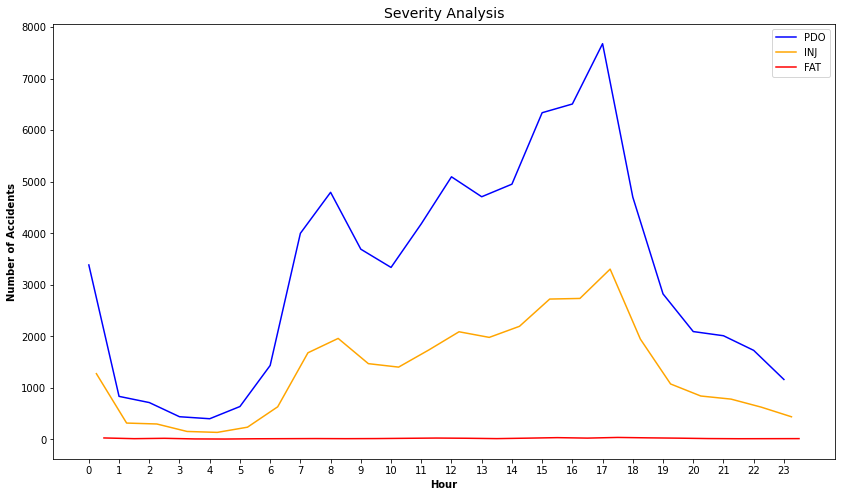

In [7]:
frames = [df['Hour'],df['severity']]
result = pd.concat(frames, axis=1)
df_severity = result.groupby(["Hour","severity"]).size()
# print(df_severity)

sev_bars1 = df_severity.loc[(df_severity.index.get_level_values('severity') =="PDO")].values
sev_bars2 = df_severity.loc[(df_severity.index.get_level_values('severity') =="INJ")].values
sev_bars3 = df_severity.loc[(df_severity.index.get_level_values('severity') =="FAT")].values
print("PDO accidents: ",sev_bars1)
print("INJ accidents: ",sev_bars2)
print("Fatal accidents: ",sev_bars3)

# Set position of bar on X axis
r1 = np.arange(len(sev_bars1))
r2 = [x + barWidth for x in r1]
r3 = [x2 + barWidth for x2 in r2]

# Make the plot
plt.rcParams["figure.figsize"]=[14, 8]
plt.plot(r1, sev_bars1, color='blue', label='PDO')
plt.plot(r2, sev_bars2, color='orange', label='INJ')
plt.plot(r3, sev_bars3, color='red', label='FAT')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(sev_bars1))],df_severity.index.get_level_values('Hour').unique())
plt.title('Severity Analysis', fontsize=14)
# Create legend & Show graphic
plt.legend()
plt.xlabel("Hour",fontweight='bold')
plt.ylabel("Number of Accidents",fontweight='bold')
plt.show()

Number of accidents during US Holiday dates

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (33,58,99) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


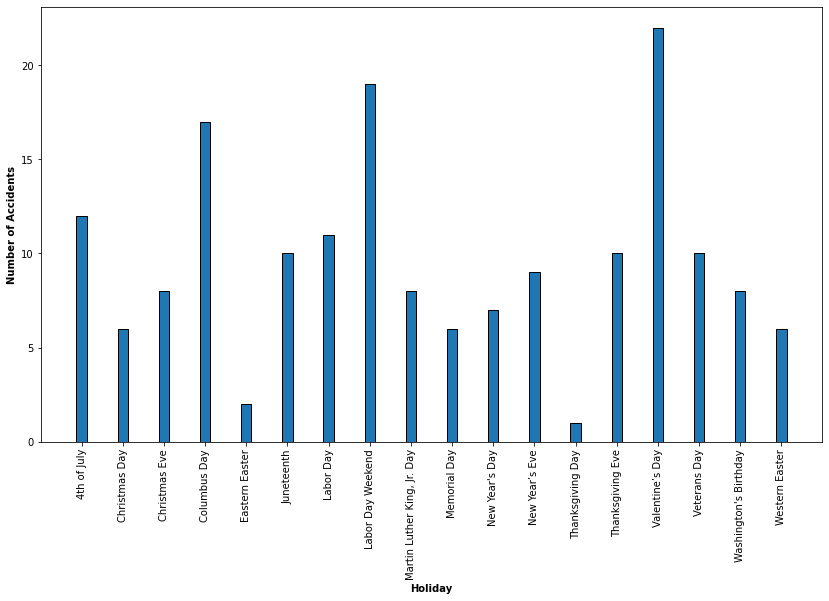

In [8]:
df_crash = pd.read_csv('/content/drive/MyDrive/data_mining/Crashes.csv')
df_holiday = pd.read_csv('/content/drive/MyDrive/data_mining/US Holiday Dates.csv')
df_holiday['Date'] = pd.to_datetime(df_holiday['Date']) 
mask = (df_holiday['Date'] <= '2020-12-31')
df_holiday_filtered = df_holiday.loc[mask]

df_crash['date'] = pd.to_datetime(df_crash['date']).dt.tz_localize(None)
crash_mask = (df_crash['date'] >= '2004-01-01')
df_crash_filtered = df_crash.loc[crash_mask]

df_merged = df_crash_filtered.merge(df_holiday_filtered, how='inner', left_on='date', right_on='Date')

# print(df_merged)
df_hol = df_merged.groupby(["Holiday"]).size()
bars = df_hol.values
x = np.arange(len(bars))

# plt.rcParams["figure.figsize"]=[12, 6]
plt.bar(x, bars, width=barWidth, edgecolor='black')

# Add xticks on the middle of the group bars
plt.xticks([r for r in range(len(bars))],df_hol.index.get_level_values('Holiday').unique(),rotation=90)
plt.xlabel("Holiday",fontweight='bold')
plt.ylabel("Number of Accidents",fontweight='bold')
plt.show()
